# ReCCO = Reconstruction Code for Cosmological Observables

The code consists of two main modules that handle the following tasks:

1) $\textbf{spectra.py}$  computes angular power spectra for a variety of cosmological fields on our past lightcone. 

2) $\textbf{estim.py}$ takes input angular power spectra and runs the quadratic estimator machinery: computation of reconstruction noise, biases, principal component analysis, and Gaussian simulations.

## spectra.py : Basic concepts and set up

Mutiple cosmological fields can be defined on our past lightcone and used to construct cosmological observables. A three-dimensional field on our past lightcone can be integrated with a radial window function to construct a two-dimensional field.
Given:

1) Two 3-dimensional fields $\mathcal{A}$ and $\mathcal{B}$

2) A collection of $N_{\mathcal{A}}$ window functions for field $\mathcal{A}$ and a collection of $N_{\mathcal{B}}$ window functions for field $\mathcal{B}$ 

3) A list of $\ell$ multipoles to sample of length $N_L$

$\textbf{spectra.py}$ generates full covariances matrices between the corresponfing 2-dimensional fields at each sample $\ell$, returning matrices of shape $(N_L, N_{\mathcal{A}}, N_{\mathcal{B}})$.

For most of the fields supported in the code, the window functions are hard coded but allow for some flexibility:

The binning described below is performed along the past lightcone, between redshifts $z_{min}$ and $z_{max}$, set in the configuration module$\textbf{config.py}$.

1) A group of fields, which we will refer as "Pi-binned" or "Top-hat" binned, are asigned N top hat window functions of equal size in comoving space. The number of these window functions is controlled by the parameter "N_{bins}" $\textbf{config.py}$

2) A second group of fields, which we will refer as "Fully integrated", are asigned a single window function, i.e., they are 2-dimensional fields obtained from a complete line of sight integration between $z_{min}$ and $z_{max}$ along the lightcone.

3) The last group of fields is the galaxy field on the past lightcone. The window functions are determined by the large scale structure experiment under consideration. The LSS experiment is determined by the parameter "LSSexperiment in 
$\textbf{config.py}$, anc currently only three modes are available : "LSST", "unwise_blue" and "custom". We dicuss these choices below.


### Base layer computations

$\textbf{spectra.py}$ is divided into two layers of computation. The base layer takes care of computing Cls for cosmological fields that serve as building blocks to compute more complex signals. 

The "Pi-binned" fields that can be computed with the base layer are:

1) vr (radial component of the velocity field on the lightcone) 

2) vt (transverse velocity potential field on the lightcone)

3) taud (differential optical depth field on the lightcone)

4) ml (moving lens potential field on the lightcone)

5) e (electron density field on the lightcone)

6) m (dark matter density field on the lightcone)

These fields have a $N_{\mathcal{A}}$ = N_bins number of windows



The "Fully integrated" fields that can be computed with the base layer are:

7) CIB (Cosmic Infrarred background at multiple frequencies)

8) tSZ (thermal Sunyaev-Zel'dovich signal at multiple frequencies)

9) isw_lin (linear isw signal)

10) pCMB (primary CMB, both lensed and unlensed)

11) lensing (lensing potential)

These fields have a $N_{\mathcal{A}} = 1$ number of windows


The galaxy fields can also be computed computed with the base layer are:

7) g

These fields have a $N_{\mathcal{A}}$ = N_bins or $N_{\mathcal{A}} = 1$ number of windows depending on the 
LSS experiment selected ( "LSST" has N_bins, "unwise_blue" and "custom" have only 1) 

Examples of output:

If we compute the 'vr'-'vr' covariance matrix, we will obtain a ($N_L$, N_bins, N_bins) matrix

If we compute the 'CIB'-'tSZ' covariance matrix, we will obtain a ($N_L$, 1, 1) matrix

If we compute the 'g'-'CIB' covariance matrix for the "LSST" experiment configuration, we will obtain a ($N_L$, N_bins, 1) matrix



One can compute and save the angular power spectra between these observables by running the following in the command line:

$\textbf{python spectra.py -t1 A -t2 B -lmax LMAX}$

where A and B are replaced by any of the fields listed above, and LMAX is replaced by the desired LMAX. For example, if I want to obtain the Cl_g_g up to LMAX of 6144 I need to run:

$\textbf{python spectra.py -t1 g -t2 g -lmax 6144}$

or, if I wanted  Cl_vr_taud up to LMAX of 6144 I need to run:

$\textbf{python spectra.py -t1 vr-t2 taud -lmax 6144}$

$\textbf{NOTE}$: pCMB can only be paired with itself (i.e. A = B = pCMB)

We include a shell script, $\textbf{get_spectra.sh}$, to generate all the necessary Cls for second layer computation. Just run 

$\textbf{bash get_spectra.sh}$

and make sure to modify LMAX accordignly in $\textbf{get_spectra.sh}$ before running.

### Post computation layer

Once the base layer fields are computed, spectra.py allows us to construct several new Cls:

1) $\textbf{kSZ signal}$: The kSZ signal can be constructed from previously computed base layer fields (vr and taud). If I have stored data for Cl_vr_vr, Cl_vr_taud and Cl_taud_taud computed with a number N of bins, then the kSZ signal is computed running:

$\textbf{python spectra.py -postcomp -kSZ N -lmax LMAX}$ 

Example: Let's say I want to calculate the kSZ signal sourced on our past lightcone between redshifts of z_min = 1 and z_max = 2 (set these in $\textbf{config.py}$) and up to $\ell$ of 6000. First I need to compute Cl_vr_vr, Cl_vr_taud and Cl_taud_taud on the past lightcone, which is subdivided into N_bins (set these in $\textbf{config.py}$) redshift bins. The higher the choice of N_bins, the more accurate the kSZ will be, but it will take longer. Once z_min, z_max, and N_bins (lets say 64) are set run :

$\textbf{python spectra.py -t1 vr -t2 vr -lmax 6000}$

$\textbf{python spectra.py -t1 taud -t2 taud -lmax 6000}$

$\textbf{python spectra.py -t1 taud -t2 vr -lmax 6000}$

and then run 

$\textbf{python spectra.py -postcomp -kSZ 64 -lmax 6000}$ 

and that will save the kSZ signal. 


2) $\textbf{Moving lens signal}$: The kSZ signal can be constructed from previously computed base layer fields (ml and vt). If I have stored data for Cl_vt_vt, Cl_vt_ml and Cl_ml_ml computed with a number N of bins, then the moving lens signal is computed running:

$\textbf{python spectra.py -postcomp -kSZ N -lmax LMAX}$ 


3)$\textbf{Coarse graining of fields}$: data computed with N_bins = Nfine can be transformed into data with the current N_bins configuration using:

$\textbf{python spectra.py -postcomp -coarse Nfine -lmax LMAX}$ 

assuming Nfine and N_bins actual are both powers of 2 and Nfine > N_bins. 


4) $\textbf{Multi-frequency temperature cleaning}$: The CMB contains multiple frequency dependent foregrounds that 
we might want to clean. Using 

$\textbf{python spectra.py -postcomp -cleanTX A -lmax LMAX}$ 

will return the ILC cleaned CMB temperature (accounting for tSZ,CIB and instrument noise) and additionally , the Cl_TA cleaned spectrum. 

Example: I want to get the frequency cleande Cl_T_T and Cl_T_g spower spectra up to LMAX of 8000. I have to run:

$\textbf{python spectra.py -postcomp -cleanTX g -lmax 8000}$ 


## estim.py

This module collects the Cls calculated with $\textbf{spectra.py}$ and uses them to compute:

1) Reconstruction noise for radial velocity and transverse velocity potential reconstruction

2) Reconstruction biases

Additionally, $\textbf{estim.py}$ posseses a pipeline to simulate the reconstruction of the radial velocity and transverse velocity potential assuming Gaussianity of underlying fields.

Below we exemplify the use of the code:

In [1]:
########  SET UP

#Import modules

import estim 
import config as conf
import numpy as np
from matplotlib import pyplot as plt

#Initialize the estimator class. To do so, you have to provide the l_max for your precomputed Cl data (here 6144)
#and you also need the configuration module used when calculating the Cls

EST = estim.estimator(data_lmax = 6144,conf_module = conf)


Default lss = 'g' . Modify with set_lss method.
Default N_fine_modes = 8. Modify with set_Nfine method.


In [2]:
# The default large scale structure tracer is 'g' which corresponds to galaxies. It can be changed to other tag if the user
# has appropiate Cl data.

#N_fine_modes is used to identify precomputed data with a higher radial resolution. 
#This is only relevant if we want to compute the "Fine mode noise" of the reconstruction.
#By default, it is set to N_bins ( 8 in this example), which translates to a vanishing Fine mode noise.
#In order to demontrate the Fine mode noise calculation, we manually set N_fine_modes to 16, for which
#we also have precomputed Cls.

EST.set_Nfine(16)


N_fine_modes reset to 16


In [3]:
# Now we can load the relevant recomputed Cls we need to caclulate reconstruction noises, biases, etc. 
# Because the reconstruction is based on the statistical anisotropy in the temperature-LSS correlation
# we need to account for the different sources of statistical anisotropy. The ones considered in this code are:

# 1)The kSZ effect
# 2)The moviling lens effect
# 3) CMB lensing
# 4) Calibration errors in the large angle galaxy maps

# When loading the theory Cls, we can decide to load the relevant spectra for each of these effects or not just in
# case we are only interested in one of them and we don't want toc alculate extra Cls(calibration
# errors are easy to generate so its always done) 

# In the case below, we laod Cls relevant to all sources of statistical anisotropy

# The use_cleaned option determines if we want to use the frequency cleaned CMB temperature or not
# If use_cleaned is False, we can either use the temperatue at a given frequency or, if frequency = None, the
# code sets the temperature to a simple CMB + white noise case. 

# We ser get_haar = True if we want to calculate the fine mode noise. This will require that you have the necessary
# precomputed Cls with N_fine_modes as chosen in the cell above. 

EST.set_theory_Cls(add_ksz =True, add_ml = True,add_lensing = True, use_cleaned = True, frequency = None, get_haar = True)

Using clean TT
Getting fine mode spectra


(6145, 8, 8)


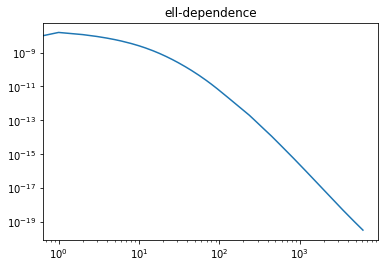

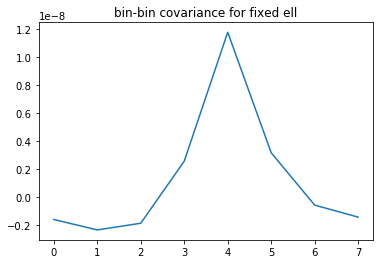

In [4]:
# Now we can load precomputed Cls. For example

C_vr_vr = EST.Cls['vr-vr']  #get the Cl 
print(C_vr_vr.shape)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(np.arange(6145),C_vr_vr[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l1 = 2
b1 = 4

plt.plot(np.arange(EST.nbin),C_vr_vr[l1,b1,:])
plt.title('bin-bin covariance for fixed ell')
plt.show()

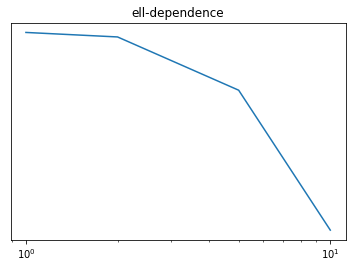

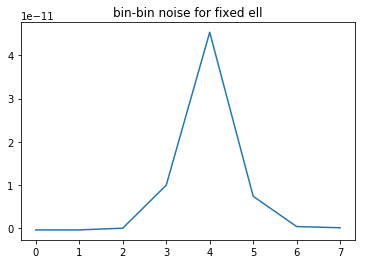

In [5]:
####### We can compute several sources of noise

Ls = [1,2,5,10] 


#Gaussian or N^0 noise
# Est.N_G(lmax ,est_tag, L) 
# where lmax is the maximum ell we want to use for the reconstruction
# tag is the field ve are reconstructing 
# L is just the set of ells we want to calculate the noise for

N_G = EST.N_G(6144 ,'vr', Ls)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(Ls,N_G[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l_id = 0
b1  = 4

plt.plot(np.arange(EST.nbin),N_G[l_id,b1,:])
plt.title('bin-bin noise for fixed ell')
plt.show()

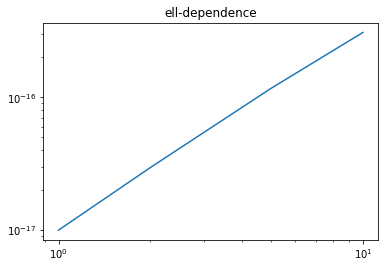

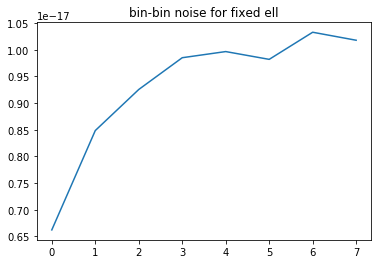

In [6]:
# Reconstruction noise on reconstructed fiels due to statistical anisotropy from other fields 

# We use the function
# EST.Noise_a_from_b_matrix(lmax, tag_g, tag_f1, tag_f2, L)
# where lmax is the maximum ell we want to use for the reconstruction
# tag_g is the field ve are reconstructing 
# tag_f1 is one of the additional statistical anisotropy sourcing fields
# tag_f2 is one of the additional statistical anisotropy sourcing fields
# NOTE: tag_g = tag_f1 = tag_f2 just calculates the N_G noise.

# Example_1: to get the noise on the radial velocity reconstruction induced by the 
# the transverse velocity (through the moving lens effect) we do:

Ls = [1,2,5,10] 

N_vr_from_vt = EST.Noise_a_from_b_matrix(6144, 'vr', 'vt', 'vt', Ls)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(Ls,N_vr_from_vt[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l_id = 0
b1  = 4

plt.plot(np.arange(EST.nbin),N_vr_from_vt[l_id,b1,:])
plt.title('bin-bin noise for fixed ell')
plt.show()

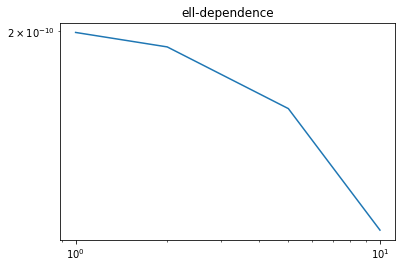

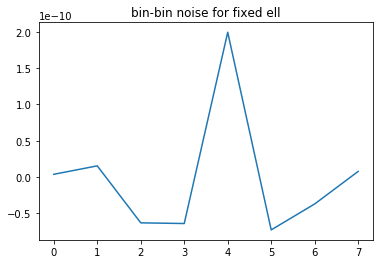

In [7]:
# Example_2: to get the noise on the radial velocity reconstruction induced by the 
# fine modes of the radial velocity we do:

Ls = [1,2,5,10] 

N_vr_from_vrf = EST.Noise_a_from_b_matrix(6144, 'vr', 'vr_fine', 'vr_fine', Ls)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(Ls,N_vr_from_vrf[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l_id = 0
b1  = 4

plt.plot(np.arange(EST.nbin),N_vr_from_vrf[l_id,b1,:])
plt.title('bin-bin noise for fixed ell')
plt.show()

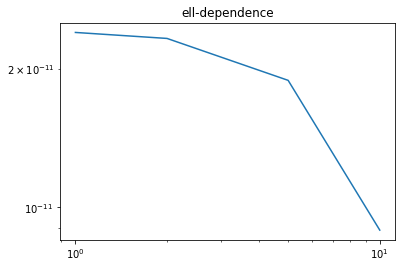

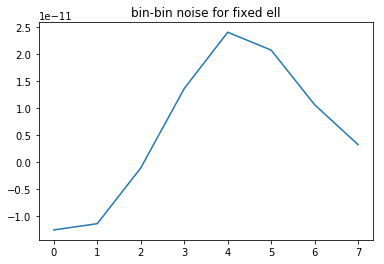

In [8]:
# Example_3: to get the noise on the radial velocity reconstruction induced by the 
# calibration erros on the large scale galaxy fields we do:

Ls = [1,2,5,10] 

N_vr_from_cal = EST.Noise_a_from_b_matrix(6144, 'vr', 'cal', 'cal', Ls)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(Ls,N_vr_from_cal[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l_id = 0
b1  = 4

plt.plot(np.arange(EST.nbin),N_vr_from_cal[l_id,b1,:])
plt.title('bin-bin noise for fixed ell')
plt.show()

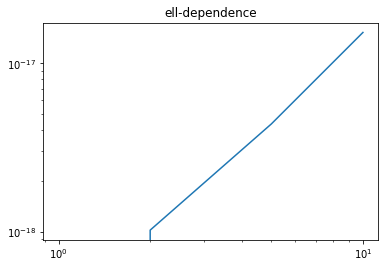

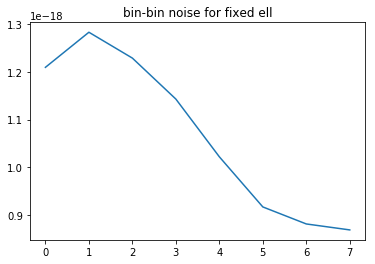

In [9]:
# Example_4: to get the noise on the radial velocity reconstruction induced by 
# CMB lensing we do:

Ls = [1,2,5,10] 

N_vr_from_lens = EST.Noise_a_from_b_matrix(6144, 'vr', 'pCMB', 'pCMB', Ls)

#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(Ls,N_vr_from_lens[:,b1,b2])
plt.title('ell-dependence')
plt.show()

#plot bin-bin covariance for a given ell

l_id = 1
b1  = 4

plt.plot(np.arange(EST.nbin),N_vr_from_lens[l_id,b1,:])
plt.title('bin-bin noise for fixed ell')
plt.show()

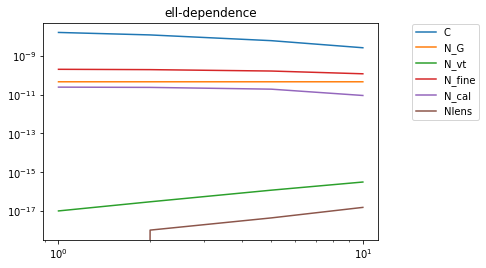

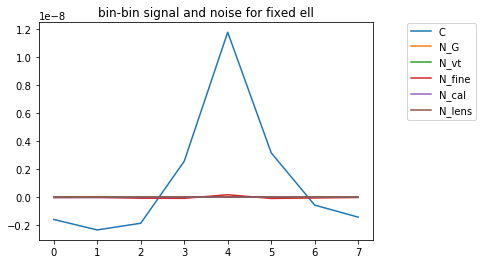

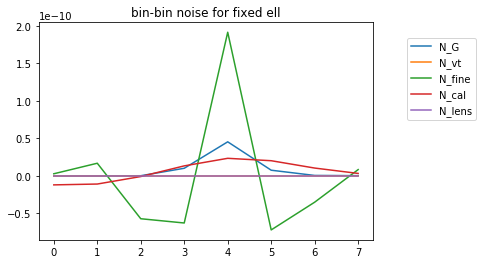

In [10]:
# We can compare signal and noise contributions together

Ls = [1,2,5,10] 



#plot ell dependence for a couple of bins 
b1 = 4
b2 = 4
plt.loglog(np.arange(6145)[Ls],C_vr_vr[Ls,b1,b2],label = 'C')
plt.loglog(Ls,N_G[:,b1,b2],label = 'N_G')
plt.loglog(Ls,N_vr_from_vt[:,b1,b2],label = 'N_vt')
plt.loglog(Ls,N_vr_from_vrf[:,b1,b2],label = 'N_fine')
plt.loglog(Ls,N_vr_from_cal[:,b1,b2],label = 'N_cal')
plt.loglog(Ls,N_vr_from_lens[:,b1,b2],label = 'Nlens')
plt.title('ell-dependence')
plt.legend(loc = (1.1,0.55))
plt.show()


#plot bin-bin covariance for a given ell

l_id = 1
b1  = 4
plt.plot(np.arange(EST.nbin),C_vr_vr[Ls[l_id],b1,:],label = 'C')
plt.plot(np.arange(EST.nbin),N_G[l_id,b1,:],label = 'N_G')
plt.plot(np.arange(EST.nbin),N_vr_from_vt[l_id,b1,:],label = 'N_vt')
plt.plot(np.arange(EST.nbin),N_vr_from_vrf[l_id,b1,:],label = 'N_fine')
plt.plot(np.arange(EST.nbin),N_vr_from_cal[l_id,b1,:],label = 'N_cal')
plt.plot(np.arange(EST.nbin),N_vr_from_lens[l_id,b1,:],label = 'N_lens')
plt.title('bin-bin signal and noise for fixed ell')
plt.legend(loc = (1.1,0.55))
plt.show()

plt.plot(np.arange(EST.nbin),N_G[l_id,b1,:],label = 'N_G')
plt.plot(np.arange(EST.nbin),N_vr_from_vt[l_id,b1,:],label = 'N_vt')
plt.plot(np.arange(EST.nbin),N_vr_from_vrf[l_id,b1,:],label = 'N_fine')
plt.plot(np.arange(EST.nbin),N_vr_from_cal[l_id,b1,:],label = 'N_cal')
plt.plot(np.arange(EST.nbin),N_vr_from_lens[l_id,b1,:],label = 'N_lens')
plt.title('bin-bin noise for fixed ell')
plt.legend(loc = (1.1,0.55))
plt.show()

In [11]:
# We can investigate the signal to per reconstructed l,M mode using a principal component analysis
# We can call EST.pmode_vrvr(lmax, L, fine = True, cal = True)
# where we can decide to include the fine mode noise and calibration noise into the SN calculation
# This functions returns:
# 1)A (len(L),N_bins) matrix cotaining the signal to noise for the 
# N_bins principal component modes at each sample ell
#2 2) The roration matrix c^{j,i} that rotates from the bin-bin basis to the principal component basis

Ls = [1,2,5] 

SN,R_P = EST.pmode_vrvr(6144, Ls, fine = False, cal = False)

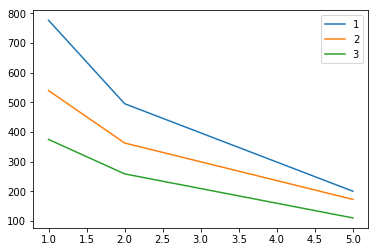

In [12]:
#Signal to noise per mode as a function of ell for the three highest signal to noise principal component
plt.plot(Ls, SN[:,-1], label = '1')
plt.plot(Ls, SN[:,-2], label = '2')
plt.plot(Ls, SN[:,-3], label = '3')
plt.legend()
plt.show()

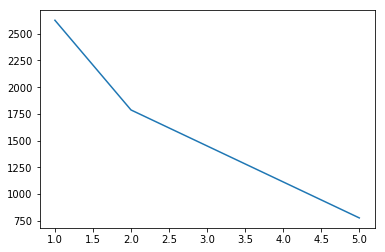

In [13]:
#Total signal to noise per ell,m mode as a function of ell (sum over all j-modes)
plt.plot(Ls, np.sum(SN,axis = 1))
plt.show()

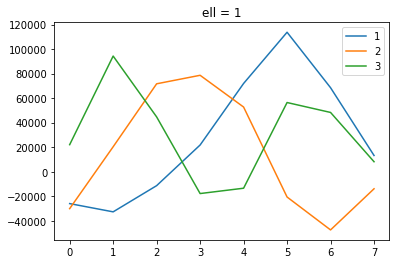

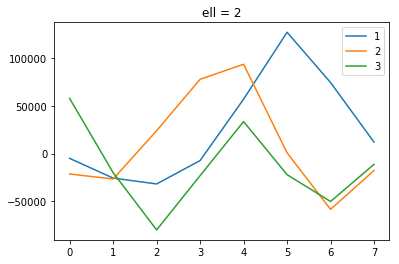

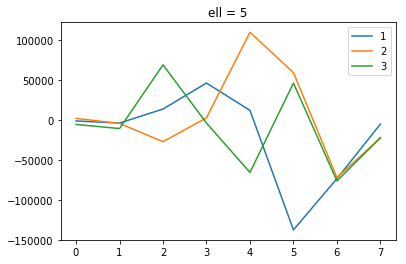

In [14]:
# Combination of bin-basis velocities that gives the three largest SN principal components for various ells

plt.plot(np.arange(EST.nbin), R_P[0,-1,:], label = '1')
plt.plot(np.arange(EST.nbin), R_P[0,-2,:], label = '2')
plt.plot(np.arange(EST.nbin), R_P[0,-3,:], label = '3')
plt.title('ell = '+str(Ls[0]))
plt.legend()
plt.show()

plt.plot(np.arange(EST.nbin), R_P[1,-1,:], label = '1')
plt.plot(np.arange(EST.nbin), R_P[1,-2,:], label = '2')
plt.plot(np.arange(EST.nbin), R_P[1,-3,:], label = '3')
plt.title('ell = '+str(Ls[1]))
plt.legend()
plt.show()

plt.plot(np.arange(EST.nbin), R_P[2,-1,:], label = '1')
plt.plot(np.arange(EST.nbin), R_P[2,-2,:], label = '2')
plt.plot(np.arange(EST.nbin), R_P[2,-3,:], label = '3')
plt.title('ell = '+str(Ls[2]))
plt.legend()
plt.show()

### Gaussian simulations

In [16]:
# We can simulate the reconstruction of the radial velocity using
# EST.get_qe_vr_sims(nside, nsideout, n_level, use_cleaned = True, frequency = None, mask = False) where
# 1)nside determines the resolution of the simulations
# 2)nsideout determines the resolution of the output maps (this can be way lower than nside because we are
# interested in reconstructing large angle fields.)
# 3)n_level is a convergence parameter (set to zero is good enough for most cases)
# 4)use_cleaned determines if we want to use the cleaned CMB temperature for the sims
# 5)frequency determines if we want to do the simulation using CMB temperature at a particular temperature
# 6) mask determines if we reconstruct using an externally provided mask

# we can set the number of realizations we want using

EST.real_num = 1

# Gaussian realizations can be done using a mix of healpy and Choleski decomposition we coded
# At the moment, for low number of bins our Cholesky method sometimes fails due to small
# numerical errors. If such erros occur, we can turn of the Cholesky method andjust use healpy 

EST.use_cholesky = False


#This function simply saves the reconstructed maps for later manipulation
#Example:
EST.get_qe_vr_sims(1024, 64, 0, use_cleaned = True, frequency = None, mask = False)


Using clean TT
Getting theory noise
Theory noise ready
real = 0
Getting sims
cholesky
formatting covmat
generating realization


/Users/jcayuso/opt/anaconda3/envs/wigner/lib/python3.6/site-packages/healpy/sphtfunc.py:438: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/Users/jcayuso/opt/anaconda3/envs/wigner/lib/python3.6/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/Users/jcayuso/opt/anaconda3/envs/wigner/lib/python3.6/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


Reconstructing velocity


In [17]:
#we can directly load the maps using
# EST.load_qe_sims_maps(real,tag, nside, nsideout, n_level, use_cleaned = True, frequency = None, mask = False) where
# real is the realization number and tag is the field being reconstructed 

qe_full,qe_gauss =  EST.load_qe_sims_maps(0,'vr', 1024, 64, 0, mask = False)

#qe_full is the full estimated veloicty, qe_gauss is the simulated reconstruction gaussian noise N_G


In [18]:
# we can also compute spectra for the signal and noise using 
#EST.get_clqe_vr_sims(nside, nsideout, n_level, mask = False) 
EST.get_clqe_vr_sims(1024, 64, 0, mask = False) 

Getting rotation matrix 
Rotation matrix ready
0


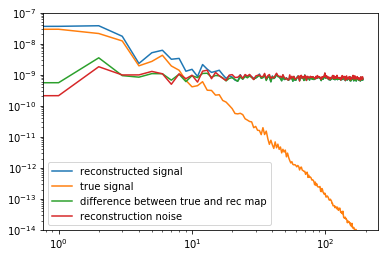

In [21]:
# and we can load the calculated spectra using 
# EST.load_clqe_sim(real,tag,nside, nsideout, n_level, mask = True)

C1,C2,C3,C4 =EST.load_clqe_sim(0,'vr',1024, 64, 0, mask = False) 

plt.loglog(np.arange(3*64), C1[:,0], label= 'reconstructed signal')
plt.loglog(np.arange(3*64), C2[:,0], label= 'true signal')
plt.loglog(np.arange(3*64), C3[:,0], label= 'difference between true and rec map')
plt.loglog(np.arange(3*64), C4[:,0], label= 'reconstruction noise')
plt.ylim([1e-14,1e-7])
plt.legend()
plt.show()